<a href="https://colab.research.google.com/github/GrueneKatze/AI-for-Medicine-Coursera/blob/master/Pneumonia_detection_with_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
bs = 64

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [0]:
!pip install -q pydicom

In [0]:
import pydicom
import pylab

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [6]:
!pip install tensorflow-io

     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 421.8MB 27kB/s 
     |████████████████████████████████| 3.9MB 49.9MB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8f39c0ce88d12453a10e4fac9fdb1d948d5f0aae9b9c077adcac80f50ac722bc
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled

In [0]:
import tensorflow_io as tfio

In [0]:
#https://www.kaggle.com/search?q=pneumonia+detection+in%3Anotebooks
#https://www.kaggle.com/natevegh/pneumonia-detection-98-acc-fastai-2019-update
#https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

In [0]:
import zipfile

In [20]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
path_try = Path(base_dir + 'data/rsna/try')
path_try.mkdir(parents=True, exist_ok=True)

In [0]:
path_test = Path(base_dir + 'data/rsna/test')
#for folder in folders:
#path = Path(base_dir + 'rsna/test')
#dest = path/folder
path_test.mkdir(parents=True, exist_ok=True)

In [0]:
path_images = Path(base_dir + 'data/rsna/images')
path_images.mkdir(parents=True, exist_ok=True)

In [24]:
path = Path(base_dir + 'data/rsna')
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/stage_2_train_images.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/stage_2_test_images.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/stage_2_train_labels.csv.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/try'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/images')]

In [0]:
#works, unzips files in Colab only
#path to one of the files unzipped /content/gdrive/My Drive/fastai-v3/data/rsna/test/0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm
with zipfile.ZipFile(path/'stage_2_train_images.zip', 'r') as zip_ref:

  zip_ref.extractall(path_images)

In [0]:
with zipfile.ZipFile(path/'stage_2_train_labels.csv.zip', 'r') as zip_ref:

  zip_ref.extractall(path_try)

### Exploring data

In [13]:
len(os.listdir(path_images))

26684

In [14]:
os.listdir(path_images)[0]

'f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm'

In [0]:
len(os.listdir(path_test))

3000

In [0]:
os.listdir(path_test)[0]

'260b87ff-df13-4177-90bb-53fb0618b1db.dcm'

In [15]:
fname = os.listdir(path_images)[0]
path_images/fname

PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/images/f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm')

In [0]:
filename = '/content/gdrive/My Drive/fastai-v3/data/rsna/images/f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm'#path_images/fname#'/content/gdrive/My Drive/fastai-v3/data/rsna/test/0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm'
image_bytes = tf.io.read_file(filename)

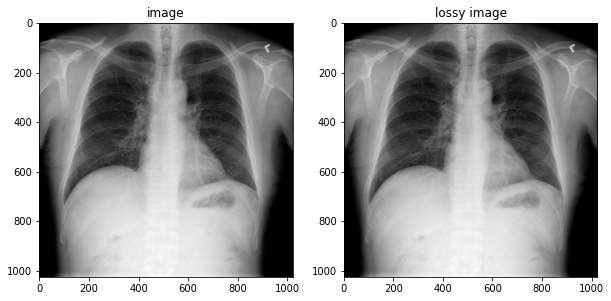

In [17]:


image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [0]:
tfms = get_transforms()

In [28]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path_images, size=256, bs=bs, ds_tfms=tfms).normalize(imagenet_stats) #valid='val', valid_pct=0.2,
                                  

IndexError: ignored

In [0]:
len(os.listdir(path_images))

26684

In [0]:
os.listdir(path_images)[0:10]

['f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm',
 'f79fa94e-8886-425c-95d4-81abfea92aee.dcm',
 'f79fc759-fde0-4e2e-8951-26ac8af5ef89.dcm',
 'f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9.dcm',
 'f7a172fc-a34f-4155-806d-7b0afe2a6156.dcm',
 'f7a1de8c-7802-4af3-98c4-4dfb088b986d.dcm',
 'f7a37b72-fda5-4adc-b3b0-968c923bc1c6.dcm',
 'f7a42b73-f909-4e1f-89dd-c776f45cdc40.dcm',
 'f7a488d3-34b2-4bcf-b61a-b4ad12c230e0.dcm',
 'f7a5fd29-dd8d-4f85-8164-69b2e83da35e.dcm']

ERROR! Session/line number was not unique in database. History logging moved to new session 59
     |████████████████████████████████| 35.3MB 99kB/s 


In [0]:
#https://www.kaggle.com/gpreda/rsna-pneumonia-detection-eda
#https://colab.research.google.com/drive/1reOc-bBi2CNBZ94rHsy86dMJbm9KwJGU
data_row_img = pydicom.dcmread(imagePath)

In [0]:
ds=pydicom.read_file(path_images/'0afef50e-63a7-4adf-9bc1-02f73612be56.dcm')


AttributeError: ignored

In [0]:
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
<matplotlib.image.AxesImage object at 0x0162A530>
pylab.show()

In [0]:
img = open_image(path_images/'0afef50e-63a7-4adf-9bc1-02f73612be56.dcm')#data/rsna/4b4d8179-7c0d-415f-bb11-5dbda89b5abe.dcm'#'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
#'/root/.fastai/data/rsna/5c26b94b-78f6-49ff-95a7-a2e4fce83778.dcm'
print(img.data.shape)
img.show()

UnidentifiedImageError: ignored

> /usr/local/lib/python3.6/dist-packages/PIL/Image.py(2862)open()
   2860         warnings.warn(message)
   2861     raise UnidentifiedImageError(
-> 2862         "cannot identify image file %r" % (filename if filename else fp)
   2863     )
   2864 

--KeyboardInterrupt--
--KeyboardInterrupt--
--KeyboardInterrupt--


In [0]:
!unzip path/stage_2_test_images.zip -d path_test

unzip:  cannot find or open path/stage_2_test_images.zip, path/stage_2_test_images.zip.zip or path/stage_2_test_images.zip.ZIP.


In [0]:
!unzip -q path/stage_2_test_images.zip -d path_test

unzip:  cannot find or open path/stage_2_test_images.zip, path/stage_2_test_images.zip.zip or path/stage_2_test_images.zip.ZIP.


In [0]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [0]:
#for data folder, works with unzipping method e.g. ! unzip -q -n {path}/stage_2_train_labels.csv.zip -d {path}
path = Config.data_path()/'rsna'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/rsna')

In [0]:
path_test = Config.data_path()/'rsna'/'test'
path_test.mkdir(parents=True, exist_ok=True)
path_test

PosixPath('/root/.fastai/data/rsna/test')

In [0]:
path_test = Path(base_dir + 'rsna/test')
#for folder in folders:
#path = Path(base_dir + 'rsna/test')
#dest = path/folder
path_test.mkdir(parents=True, exist_ok=True)

In [0]:
path = Path(base_dir + 'data/rsna')
path.mkdir(parents=True, exist_ok=True)
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [0]:
bs = 64

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/stage_2_train_labels.csv.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/stage_2_train_images.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rsna/stage_2_test_images.zip')]

In [0]:
path = Path(base_dir + 'rsna')

In [0]:
os.chdir('/content/gdrive/My Drive/fastai-v3/data/rsna')

In [0]:
!unzip -q stage_2_train_labels.csv.zip -d path_test/

unzip:  cannot find or open stage_2_train_labels.csv.zip, stage_2_train_labels.csv.zip.zip or stage_2_train_labels.csv.zip.ZIP.


In [0]:
! unzip -q -n {path}/stage_2_train_labels.csv.zip -d {path_test}

unzip:  cannot find or open /content/gdrive/My, /content/gdrive/My.zip or /content/gdrive/My.ZIP.


In [0]:
! unzip -q -n {path}/stage_2_test_images.zip -d {path}

In [0]:
! unzip -q -n {path}/stage_2_train_labels.csv.zip -d {path}

In [0]:
#path = Path('../input/chest_xray/chest_xray')
#path.ls()

In [0]:
img = open_image(path/5c26b94b-78f6-49ff-95a7-a2e4fce83778.dcm)#data/rsna/4b4d8179-7c0d-415f-bb11-5dbda89b5abe.dcm'#'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
#'/root/.fastai/data/rsna/5c26b94b-78f6-49ff-95a7-a2e4fce83778.dcm'
print(img.data.shape)
img.show()

SyntaxError: ignored